In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Regression with limited number of features

In [2]:
df = pd.read_csv('./ozon.csv')
df

,radiation,temperature,wind,ozone
0,190,67,7.4,41
1,118,72,8.0,36
2,149,74,12.6,12
3,313,62,11.5,18
4,299,65,8.6,23
...,...,...,...,...
106,20,63,16.6,14
107,193,70,6.9,30
108,191,75,14.3,14
109,131,76,8.0,18


In [3]:
feature_columns = ['radiation', 'temperature', 'wind']
label_column = ['ozone']

In [4]:
def my_train_test_split(df, feature_columns, label_column, test_size=0.2):
    
    train_set, test_set = train_test_split(
        df,
        test_size=test_size
    )

    X_train = train_set[feature_columns].to_numpy()
    Y_train = train_set[label_column].to_numpy()
    X_test = test_set[feature_columns].to_numpy()
    Y_test = test_set[label_column].to_numpy()

    return X_train, Y_train, X_test, Y_test
    
X_train, Y_train, X_test, Y_test = my_train_test_split(
    df=df,
    feature_columns=feature_columns,
    label_column=label_column,
    test_size=0.2
)
print(f'train set size: {X_train.size}')
print(f'test set size: {X_test.size}')

train set size: 264
test set size: 69


In [5]:
regressor = LinearRegression(
    copy_X=True
).fit(X_train, Y_train)
print(f'learned parameters: {regressor.coef_}')
print(f'learned intercept: {regressor.intercept_}')

learned parameters: [[ 0.07282086  1.71585659 -3.53556514]]
learned intercept: [-68.59668679]


In [6]:
train_mse = mean_squared_error(regressor.predict(X_train), Y_train)
test_mse = mean_squared_error(regressor.predict(X_test), Y_test)

print(f'train mse: {train_mse}')
print(f'test mse: {test_mse}')

train mse: 466.09144524308306
test mse: 324.04142869220317


In [7]:
NOISE_VARS = np.linspace(0, 50, 100)
train_mses = []
test_mses = []


for noise_var in NOISE_VARS:
    
    df_ = df.copy()

    df_['ozone'] = df_['ozone'].apply(
        lambda x: x + np.random.randn() * noise_var
    )
    
    X_train, Y_train, X_test, Y_test = my_train_test_split(
        df=df_,
        feature_columns=feature_columns,
        label_column=label_column,
        test_size=0.2
    )
    
    regressor = LinearRegression(
        copy_X=True
    ).fit(X_train, Y_train)
    
    train_mse = mean_squared_error(regressor.predict(X_train), Y_train)
    test_mse = mean_squared_error(regressor.predict(X_test), Y_test)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)

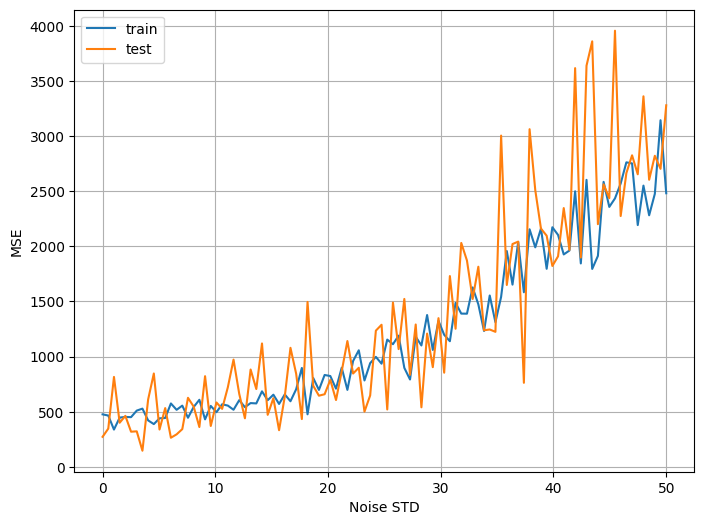

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(NOISE_VARS, train_mses, label='train')
plt.plot(NOISE_VARS, test_mses, label='test')
plt.xlabel('Noise STD')
plt.ylabel('MSE')
plt.legend()
plt.grid()

Both train and test error increase as the noise variance increases.

In [9]:
df_ = df.copy()
for col in feature_columns:
    df_[f'{col}_squared'] = df_[col].apply(lambda x: x**2)

feature_columns.extend([f'{fc}_squared' for fc in feature_columns])

In [10]:
X_train, Y_train, X_test, Y_test = my_train_test_split(
    df=df_,
    feature_columns=feature_columns,
    label_column=label_column,
    test_size=0.2
)

regressor = LinearRegression(
    copy_X=True
).fit(X_train, Y_train)

train_mse = mean_squared_error(regressor.predict(X_train), Y_train)
test_mse = mean_squared_error(regressor.predict(X_test), Y_test)

In [11]:
print(f'train mse: {train_mse}')
print(f'test mse: {test_mse}')

train mse: 274.4801879464878
test mse: 488.9076408503731


## Regression on data with large number of features

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm

In [2]:
# Load images

DATASET_PATH = Path('./dataset')
    
def load_data(data_dir, crop_slice=None):
    data = []
    for directory in os.listdir(DATASET_PATH):
        for label, img_path in enumerate(os.listdir(DATASET_PATH / directory)):
            img = cv2.imread(str(DATASET_PATH / directory / img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if crop_slice:
                img = img[crop_slice]
            data.append((img, label))
    
    return data

In [3]:
data = load_data(data_dir=DATASET_PATH)

In [4]:
X = np.concatenate(
    [x[0].reshape(1, -1) for x in data],
    axis = 0
)

Y = np.array([x[1] for x in data])

In [5]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

print(f'training size: {X_train.shape[0]}')
print(f'test size: {X_test.shape[0]}')

training size: 379
test size: 254


In [ ]:
regressor = LinearRegression(copy_X=True)
regressor.fit(X_train, Y_train)

Regressor fails to train, because it requires a lot of memory.

In [3]:
FACE_SLICE = (slice(150, -150), slice(300, 900))

data = load_data(data_dir=DATASET_PATH, crop_slice=FACE_SLICE)

In [4]:
X = np.concatenate(
    [x[0].reshape(1, -1) for x in data],
    axis = 0
)

Y = np.array([x[1] for x in data])

In [5]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

print(f'training size: {X_train.shape[0]}')
print(f'test size: {X_test.shape[0]}')

training size: 379
test size: 254


In [20]:
regressor = LinearRegression(copy_X=True)
regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
train_mse = mean_squared_error(regressor.predict(X_train), Y_train)
test_mse = mean_squared_error(regressor.predict(X_test), Y_test)

In [22]:
print(f'train mse: {train_mse}')
print(f'test mse: {test_mse}')

train mse: 6.4528638881486e-26
test mse: 430.4234151270186


Due to large number of parameters in comparison with the data points, the model overfits to data, resulting in zero train error and a large test error.

In [6]:
def get_eigen_values(X_train):
    
    # Calculate covariance matrix
    A = X_train.T
    m = A.mean(axis=1).reshape(-1, 1)
    A = A - m
    X = A.T @ A

    # Eigen value decomposition
    L, V = np.linalg.eig(X)
    U = A @ V
    U = U / np.linalg.norm(U, axis=0)

    return U, m

U, m = get_eigen_values(X_train)

In [7]:
N_features = np.linspace(1, 1000, 200, dtype=np.int32)
train_mses = []
test_mses = []

for n in tqdm(N_features):
    U_truncated = U[:, :n]
    X_train_projected = X_train @ U_truncated
    X_test_projected = X_test @ U_truncated

    regressor = LinearRegression(copy_X=True)
    regressor.fit(X_train_projected, Y_train)
    train_mse = mean_squared_error(regressor.predict(X_train_projected), Y_train)
    test_mse = mean_squared_error(regressor.predict(X_test_projected), Y_test)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)

  0%|          | 0/200 [00:00<?, ?it/s]

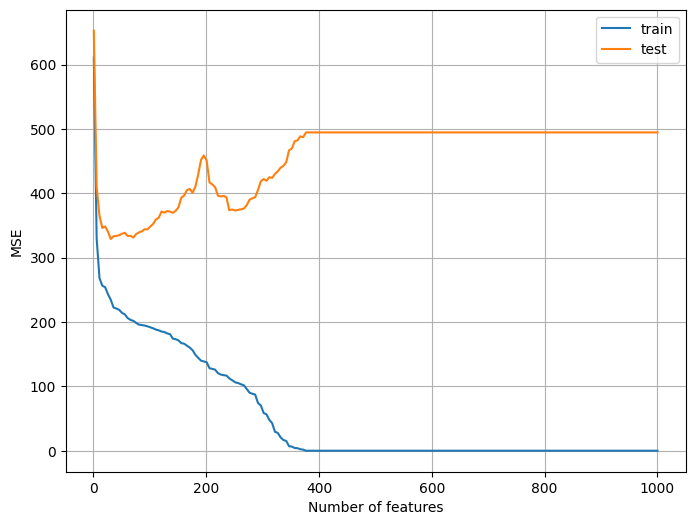

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(N_features, train_mses, label='train')
plt.plot(N_features, test_mses, label='test')
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.legend()
plt.grid()

In [9]:
print(f'smallest test error is when number of features is: ')
print(np.argmin(test_mses) + 1)

smallest test error is when number of features is: 
7


When number of features exceeds number of training data (379), train error drops to zero. Moreover, very small number of features results in large test error as well. Therefore, the best number of features must be in between, which turns out to be 7 in this problem.